In [2]:
import geopandas as gpd
import pandas as pd
import os
import getpass
import matplotlib.pyplot as plt
from earthpy.clip import clip_shp

### NOTES:
* Bring in parks buffer shapefiles
* If everything is in the same coordinate system then do the areas generated convert as well?
* What is the differene between bringing in a geojson vs. a shapefile?

###### Bring in necessary geojson files and set your projection for all files

In [3]:
wd = os.getcwd()
wd = wd[:wd.find('notebooks')]

#crs is set for Central Texas
crs =  {'init' :'epsg:6578'}

parks = gpd.read_file(wd+"data/coaparks/parkboundaries.geojson")
parks = parks.to_crs(crs)

quartbuff = gpd.read_file(wd+"data/coaparks_buffer/quarterbuffgj.geojson")
quartbuff = quartbuff.to_crs(crs)

pop = gpd.read_file(wd+"data/blockgroups_censusdata/popcount.geojson")
pop = pop.to_crs(crs)

race = gpd.read_file(wd+"data/blockgroups_censusdata/race.geojson")
race = race.to_crs(crs)

##### Check your projections
https://geopandas.org/projections.html

In [7]:
parks.crs

{'init': 'epsg:6578'}

In [8]:
quartbuff.crs

{'init': 'epsg:6578'}

In [9]:
pop.crs

{'init': 'epsg:6578'}

In [10]:
race.crs

{'init': 'epsg:6578'}

###### Preview the files and clean the data

In [4]:
pop['fullarea_pop'] = pop['geometry'].area

In [5]:
pop.head()

,level_0,level_1,GEOID10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,city_name,jurisdicti,Id,Id2,Total_POP,geometry,fullarea_pop
0,0,0,482090109011,291268.0,0.0,+30.1776997,-097.9267996,CITY OF AUSTIN,AUSTIN FULL PURPOSE,1500000US482090109011,482090109011,2205,"POLYGON ((3069238.317597141 10028016.9612432, ...",3.246546e+06
1,0,1,482090109011,291268.0,0.0,+30.1776997,-097.9267996,CITY OF AUSTIN,AUSTIN FULL PURPOSE,1500000US482090109011,482090109011,2205,"POLYGON ((3060340.445818828 10029833.26098835,...",1.955842e+07
2,1,0,482090109081,142299.0,0.0,+30.0960389,-097.8116716,CITY OF AUSTIN,AUSTIN FULL PURPOSE,1500000US482090109081,482090109081,3774,"POLYGON ((3093548.488136804 10008631.07120929,...",1.837684e+03
3,2,0,484530001011,17128.0,0.0,+30.3353452,-097.7546582,CITY OF AUSTIN,AUSTIN FULL PURPOSE,1500000US484530001011,484530001011,1045,"POLYGON ((3111310.380106392 10089474.08471978,...",1.023445e+07
4,3,0,484530001012,43720.0,0.0,+30.3247732,-097.7516364,CITY OF AUSTIN,AUSTIN FULL PURPOSE,1500000US484530001012,484530001012,1202,"POLYGON ((3109356.370562974 10091521.99532213,...",1.190644e+07


In [6]:
race['fullarea_race'] = race['geometry'].area
race.head()

,level_0,level_1,GEOID10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,city_name,jurisdicti,Id,...,Black or African American; Not Hispanic or Latino,American Indian and Alaska Native; Not Hispanic or Latino,Asian; Not Hispanic or Latino,Native Hawaiian and Other Pacific Islander; Not Hispanic or Latino,Some other race alone; Not Hispanic or Latino,Two or more races; Not Hispanic or Latino,Hispanic or Latino:,Sum of Non-Hispanic and Hispanic (Total Pop),geometry,fullarea_race
0,0,0,482090109011,291268.0,0.0,+30.1776997,-097.9267996,CITY OF AUSTIN,AUSTIN FULL PURPOSE,1500000US482090109011,...,0,0,40,78,0,34,421,2205,"POLYGON ((3069238.317597141 10028016.9612432, ...",3.246546e+06
1,0,1,482090109011,291268.0,0.0,+30.1776997,-097.9267996,CITY OF AUSTIN,AUSTIN FULL PURPOSE,1500000US482090109011,...,0,0,40,78,0,34,421,2205,"POLYGON ((3060340.445818828 10029833.26098835,...",1.955842e+07
2,1,0,482090109081,142299.0,0.0,+30.0960389,-097.8116716,CITY OF AUSTIN,AUSTIN FULL PURPOSE,1500000US482090109081,...,91,0,80,0,0,16,2507,3774,"POLYGON ((3093548.488136804 10008631.07120929,...",1.837684e+03
3,2,0,484530001011,17128.0,0.0,+30.3353452,-097.7546582,CITY OF AUSTIN,AUSTIN FULL PURPOSE,1500000US484530001011,...,26,0,0,0,0,20,113,1045,"POLYGON ((3111310.380106392 10089474.08471978,...",1.023445e+07
4,3,0,484530001012,43720.0,0.0,+30.3247732,-097.7516364,CITY OF AUSTIN,AUSTIN FULL PURPOSE,1500000US484530001012,...,0,14,0,0,0,42,121,1202,"POLYGON ((3109356.370562974 10091521.99532213,...",1.190644e+07


In [7]:
quartbuff['fullarea_buff'] = quartbuff['geometry'].area
quartbuff.head()

,ASSET_MGMT,LOCATION_N,ADDRESS,CITY_MUNIC,COUNTY,STATE,STREET_NUM,STREET_NAM,STREET_TYP,ZIPCODE,...,MXLOADID,GLOBALID,CREATED_BY,CREATED_DA,MODIFIED_B,MODIFIED_D,Shape__Are,Shape__Len,geometry,fullarea_buff
0,412,Stratford Overlook Greenbelt,"3006 Stratford Dr., Austin, Texas 78746",Austin,Travis,TX,3006,Stratford,Dr.,78746,...,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,4.403262e+03,420.672106,(POLYGON ((3099659.296639148 10076099.36654284...,6.701295e+05
1,413,Highland Neighborhood Park,"403 W St Johns Ave., Austin, Texas 78752",Austin,Travis,TX,403,W St Johns,Ave.,78752,...,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,1.048800e+04,422.279483,(POLYGON ((3122902.889064377 10096179.90844941...,6.708336e+05
2,354,Palma Plaza Pocket Park,"1524 Palma Plz., Austin, Texas 78703",Austin,Travis,TX,1524,Palma,Plz,78703,...,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,1.007678e+04,492.661534,(POLYGON ((3109810.268547425 10075962.94345382...,6.988492e+05
3,398,Oertli Neighborhood Park,"12613 Blaine Rd., Austin, Texas 78753",Austin,Travis,TX,12613,Blaine,Rd.,78753,...,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,2.671883e+05,2404.916487,(POLYGON ((3142020.189037737 10117140.78761685...,1.463807e+06
4,370,Decker Tallgrass Prairie Preserve,"8001 Decker Ln., Austin, Texas 78724",Austin,Travis,TX,8001,Decker,Ln.,78724,...,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,1.515843e+07,26672.772067,(POLYGON ((3154723.006204471 10083882.87548318...,9.294015e+06


### Run spatial analysis on the amount of people distributed within a census block group against park buffer area

In [8]:
rp_intersection = gpd.overlay(race, quartbuff, how='intersection') #https://geopandas.org/set_operations.html
rp_intersection

,level_0,level_1,GEOID10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,city_name,jurisdicti,Id,...,MXLOADID,GLOBALID,CREATED_BY,CREATED_DA,MODIFIED_B,MODIFIED_D,Shape__Are,Shape__Len,fullarea_buff,geometry
1,2,0,484530001011,17128.0,0.0,+30.3353452,-097.7546582,CITY OF AUSTIN,AUSTIN FULL PURPOSE,1500000US484530001011,...,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,3.514350e+06,56641.286637,2.083222e+07,(POLYGON ((3112577.691601671 10092106.43546111...
6,4,0,484530001013,415563.0,0.0,+30.3158528,-097.7515898,CITY OF AUSTIN,AUSTIN FULL PURPOSE,1500000US484530001013,...,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,3.514350e+06,56641.286637,2.083222e+07,"(POLYGON ((3111956.642302066 10087345.3717951,..."
20,8,0,484530002041,57831.0,0.0,+30.3027360,-097.7413860,CITY OF AUSTIN,AUSTIN FULL PURPOSE,1500000US484530002041,...,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,3.514350e+06,56641.286637,2.083222e+07,"POLYGON ((3112579.18361957 10081465.39038157, ..."
23,9,0,484530002042,16538.0,0.0,+30.3162020,-097.7451126,CITY OF AUSTIN,AUSTIN FULL PURPOSE,1500000US484530002042,...,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,3.514350e+06,56641.286637,2.083222e+07,"(POLYGON ((3112506.81962252 10086223.64617548,..."
29,10,0,484530002043,61172.0,0.0,+30.3084751,-097.7470902,CITY OF AUSTIN,AUSTIN FULL PURPOSE,1500000US484530002043,...,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,3.514350e+06,56641.286637,2.083222e+07,"(POLYGON ((3112746.76010764 10081979.97962928,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,542,0,484910204083,34157.0,0.0,+30.4530947,-097.7811364,CITY OF AUSTIN,AUSTIN FULL PURPOSE,1500000US484910204083,...,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,5.423833e+05,2970.882179,1.690157e+06,"POLYGON ((3099958.623059095 10137136.64832752,..."
1590,540,0,484910204081,9762.0,0.0,+30.4597401,-097.7933842,CITY OF AUSTIN,AUSTIN FULL PURPOSE,1500000US484910204081,...,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,9.810471e+04,1492.002528,1.070334e+06,"POLYGON ((3100175.699942092 10143570.94554514,..."
1593,552,2,484910205081,636722.0,850.0,+30.4840639,-097.7595422,CITY OF AUSTIN,AUSTIN FULL PURPOSE,1500000US484910205081,...,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,6.289057e+05,3819.975953,1.976420e+06,(POLYGON ((3104261.391998103 10149293.93935586...
1597,556,0,484910205101,2092.0,0.0,+30.4950296,-097.7673875,CITY OF AUSTIN,AUSTIN FULL PURPOSE,1500000US484910205101,...,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,6.289057e+05,3819.975953,1.976420e+06,"POLYGON ((3105146.529438345 10149196.1606759, ..."


In [9]:
rp_intersection.columns

Index(['level_0', 'level_1', 'GEOID10', 'ALAND10', 'AWATER10', 'INTPTLAT10',
       'INTPTLON10', 'city_name', 'jurisdicti', 'Id', 'Id2', 'Total_POP',
       'Not Hispanic or Latino:', 'White; Not Hispanic or Latino',
       'Black or African American; Not Hispanic or Latino',
       'American Indian and Alaska Native; Not Hispanic or Latino',
       'Asian; Not Hispanic or Latino',
       'Native Hawaiian and Other Pacific Islander; Not Hispanic or Latino',
       'Some other race alone; Not Hispanic or Latino',
       'Two or more races; Not Hispanic or Latino', 'Hispanic or Latino:',
       'Sum of Non-Hispanic and Hispanic (Total Pop)', 'fullarea_race',
       'ASSET_MGMT', 'LOCATION_N', 'ADDRESS', 'CITY_MUNIC', 'COUNTY', 'STATE',
       'STREET_NUM', 'STREET_NAM', 'STREET_TYP', 'ZIPCODE', 'ASSET_SIZE',
       'ACRE_SOURC', 'UNIT_OF_ME', 'YEAR_ACQUI', 'ASSET_STAT', 'DEVELOPMEN',
       'TPL_LANDUS', 'PARK_TYPE', 'LEVEL_OF_S', 'LEVEL_OF_U', 'SERVICE_AR',
       'COUNCIL_DI', 'COUNCI

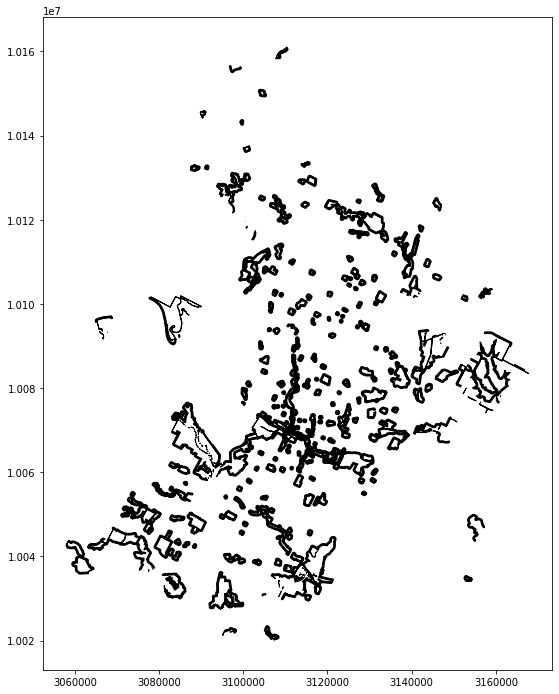

In [17]:
fig, ax = plt.subplots(figsize=(12,12))
base = rp_intersection.plot(ax=ax, color="black", alpha=0.2)
layer = rp_intersection["geometry"].plot(ax=base, color='black', edgecolor = 'black')

In [16]:
rp_intersection[['GEOID10','Total_POP','fullarea_race','LOCATION_N','fullarea_buff','geometry']]

,GEOID10,Total_POP,fullarea_race,LOCATION_N,fullarea_buff,geometry
1,484530001011,1045,1.023445e+07,Shoal Creek Greenbelt,2.083222e+07,(POLYGON ((3112577.691601671 10092106.43546111...
6,484530001013,2016,1.151098e+07,Shoal Creek Greenbelt,2.083222e+07,"(POLYGON ((3111956.642302066 10087345.3717951,..."
20,484530002041,1113,5.533474e+06,Shoal Creek Greenbelt,2.083222e+07,"POLYGON ((3112579.18361957 10081465.39038157, ..."
23,484530002042,1255,5.936942e+06,Shoal Creek Greenbelt,2.083222e+07,"(POLYGON ((3112506.81962252 10086223.64617548,..."
29,484530002043,692,8.170845e+06,Shoal Creek Greenbelt,2.083222e+07,"(POLYGON ((3112746.76010764 10081979.97962928,..."
...,...,...,...,...,...,...
1592,484910204083,835,9.487768e+05,Springwoods Neighborhood Park,1.690157e+06,"POLYGON ((3099958.623059095 10137136.64832752,..."
1590,484910204081,1797,1.660166e+07,Forest North Neighborhood Park,1.070334e+06,"POLYGON ((3100175.699942092 10143570.94554514,..."
1593,484910205081,3775,3.664291e+07,Davis Spring Special Park,1.976420e+06,(POLYGON ((3104261.391998103 10149293.93935586...
1597,484910205101,4695,3.462268e+07,Davis Spring Special Park,1.976420e+06,"POLYGON ((3105146.529438345 10149196.1606759, ..."


In [17]:
race[['GEOID10','Total_POP','fullarea_race','geometry']]

,GEOID10,Total_POP,fullarea_race,geometry
0,482090109011,2205,3.246546e+06,"POLYGON ((3069238.317597141 10028016.9612432, ..."
1,482090109011,2205,1.955842e+07,"POLYGON ((3060340.445818828 10029833.26098835,..."
2,482090109081,3774,1.837684e+03,"POLYGON ((3093548.488136804 10008631.07120929,..."
3,484530001011,1045,1.023445e+07,"POLYGON ((3111310.380106392 10089474.08471978,..."
4,484530001012,1202,1.190644e+07,"POLYGON ((3109356.370562974 10091521.99532213,..."
...,...,...,...,...
663,484910205082,1264,8.239788e+06,"POLYGON ((3100132.260730391 10153583.0096513, ..."
664,484910205091,2504,1.948094e+07,"POLYGON ((3103596.356820557 10154673.60851996,..."
665,484910205093,3192,1.100151e+07,"POLYGON ((3111608.114134965 10157930.24793256,..."
666,484910205101,4695,3.462268e+07,"POLYGON ((3105356.685648966 10148942.41788262,..."


In [ ]:
access_data = {'Park_Name':[],
       'Calc_Pop':[]}

pop_clip=rp_intersection.copy()

if park in rp_intersection:

        pop_clip['new_area'] = pop_clip['geometry'].area
        pop_clip['weight'] = pop_clip['new_area']/ pop_clip['full_area']
        pop_clip['new_pop'] = pop_clip['weight'] * pop_clip['Estimate;']

        data['Park_Name'].append(name)
        data['Calc_Pop'].append(pop_clip['new_pop'].sum())
    else: # if no pop blocks are within the park then return 0
        data['Park_Name'].append(name)
        data['Calc_Pop'].append(0)


In [ ]:
data = {'Park_Name':[],
       'Calc_Pop':[]}

from shapely.geometry import Polygon
names = quartbuff['LOCATION_N'].unique()
for i, dfrow in parks.iterrows():
     name = dfrow['LOCATION_N']

for i,name in enumerate(names):
    park = quartbuff.loc[quartbuff['LOCATION_N'] == name]
    park['geometry'] = park['geometry'].buffer(0) #This is the buffer
#     print(i, name)
    
    is_in_park = False
    for j, dfrow in pop.iterrows(): # iterate over pop shapes
#         print(dfrow['geometry'].is_valid)
        for n, dfrow2 in park.iterrows(): # iterate over buffered park shape
            # check if any pop shps fall within the buffered park shapes
            if Polygon(dfrow['geometry']).intersects(Polygon(dfrow2['geometry'])):
                is_in_park = True
                break
    if is_in_park:
        pop_valid = pop.copy()
        pop_valid['geometry'] = pop_valid['geometry'].buffer(0) # fix invalid polygons by buffering them by zero distances
        # definetly a hack and should be looked into.
        pop_clip = clip_shp(pop_valid,park)

        pop_clip['new_area'] = pop_clip['geometry'].area
        pop_clip['weight'] = pop_clip['new_area']/ pop_clip['full_area']
        pop_clip['new_pop'] = pop_clip['weight'] * pop_clip['Estimate;']

        data['Park_Name'].append(name)
        data['Calc_Pop'].append(pop_clip['new_pop'].sum())
    else: # if no pop blocks are within the park then return 0
        data['Park_Name'].append(name)
        data['Calc_Pop'].append(0)

# print(park.head())


In [ ]:
df = pd.DataFrame(data)
df['Calc_Pop'] = df['Calc_Pop'].astype(int)

df.head(10)

In [ ]:
parkspop = df.copy()
quartbuff = gpd.read_file(wd+"data/coaparks_buffer/quarterbuffgj.geojson")
qbuff = quartbuff.copy()
parksnocem= qbuff.loc[~qbuff['LOCATION_N'].str.contains('Cemetery')].reset_index()
parks_pop = parksnocem.merge(parkspop, left_on='LOCATION_N', right_on='Park_Name', suffixes=('_parksnocem', '_parkspop'))
parks_pop.to_file(wd+"data/access/parks_pop_quarterbuff_ACS17.shp")

In [ ]:
parks_pop

END OF CODE